In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import learntools.computer_vision.visiontools as visiontools

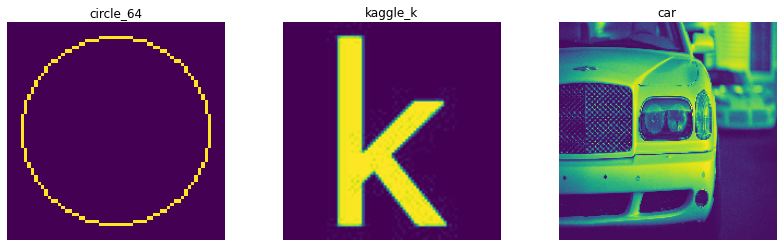

In [4]:
from learntools.computer_vision.visiontools import edge, blur, bottom_sobel, emboss, sharpen, circle

image_dir = '../../../datasets/Computer_Vision/input/computer-vision-resources/'
circle_64 = tf.expand_dims(circle([64, 64], val=1.0, r_shrink=4), axis=-1)
kaggle_k = visiontools.read_image(image_dir + str('k.jpg'), channels=1)
car = visiontools.read_image(image_dir + str('car_illus.jpg'), channels=1)
car = tf.image.resize(car, size=[200, 200])
images = [(circle_64, 'circle_64'), (kaggle_k, 'kaggle_k'), (car, 'car')]

plt.figure(figsize=(14, 4))
for i, (img, title) in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(tf.squeeze(img))
    plt.axis('off')
    plt.title(title)

plt.show();

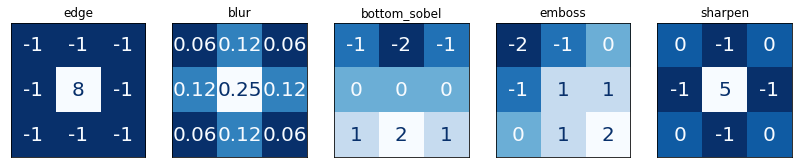

In [6]:
kernels = [(edge, 'edge'), (blur, 'blur'), (bottom_sobel, 'bottom_sobel'), (emboss, 'emboss'),
           (sharpen, 'sharpen')]
plt.figure(figsize=(14, 4))
for i, (krn, title) in enumerate(kernels):
    plt.subplot(1, len(kernels), i+1)
    visiontools.show_kernel(krn, digits=2, text_size=20)
    plt.title(title)

plt.show()

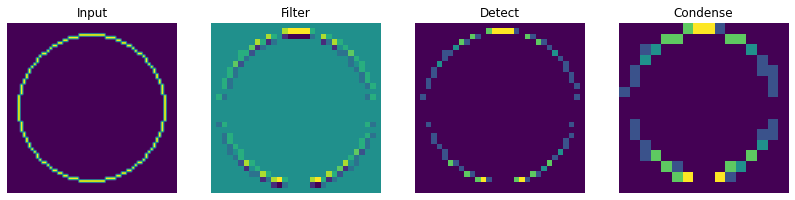

In [8]:
image = circle_64

kernel = bottom_sobel

visiontools.show_extraction(
    image, kernel,
    conv_stride = 2,
    conv_padding= 'valid',
    pool_size= 2,
    pool_stride= 2,
    pool_padding= 'same',

    subplot_shape=(1, 4),
    figsize=(14, 6)
)

<AxesSubplot:xlabel='Week'>

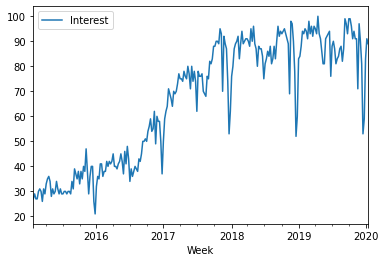

In [9]:
import pandas as pd

machinlearning = pd.read_csv(
    '../../../datasets/Computer_Vision/input/computer-vision-resources/machinelearning.csv',
    parse_dates=['Week'],
    index_col= 'Week',
)

machinlearning.plot()

In [10]:
detrend = tf.constant([-1, 1], dtype=tf.float32)

average = tf.constant([0.2, 0.2, 0.2, 0.2, 0.2], dtype=tf.float32)

spencer = tf.constant([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 32, 3, -5, -6, -3], dtype=tf.float32) / 320

<AxesSubplot:>

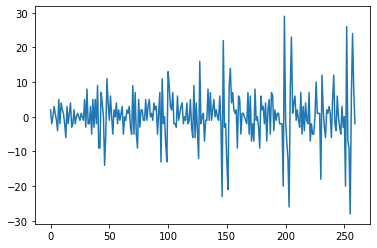

In [13]:
kernel = detrend
# kernel = average
# kernel = spencer

ts_data = machinlearning.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID'
)

machinlearning_filtered = pd.Series(tf.squeeze(ts_filter).numpy())
machinlearning_filtered.plot()